# Visualising

In [681]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df=pd.read_csv("train.csv",index_col="PassengerId")
test_df=pd.read_csv("test.csv",index_col="PassengerId")
train_df.drop("Ticket",axis=1,inplace=True)
train_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Ticket",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)


In [682]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [683]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [687]:
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


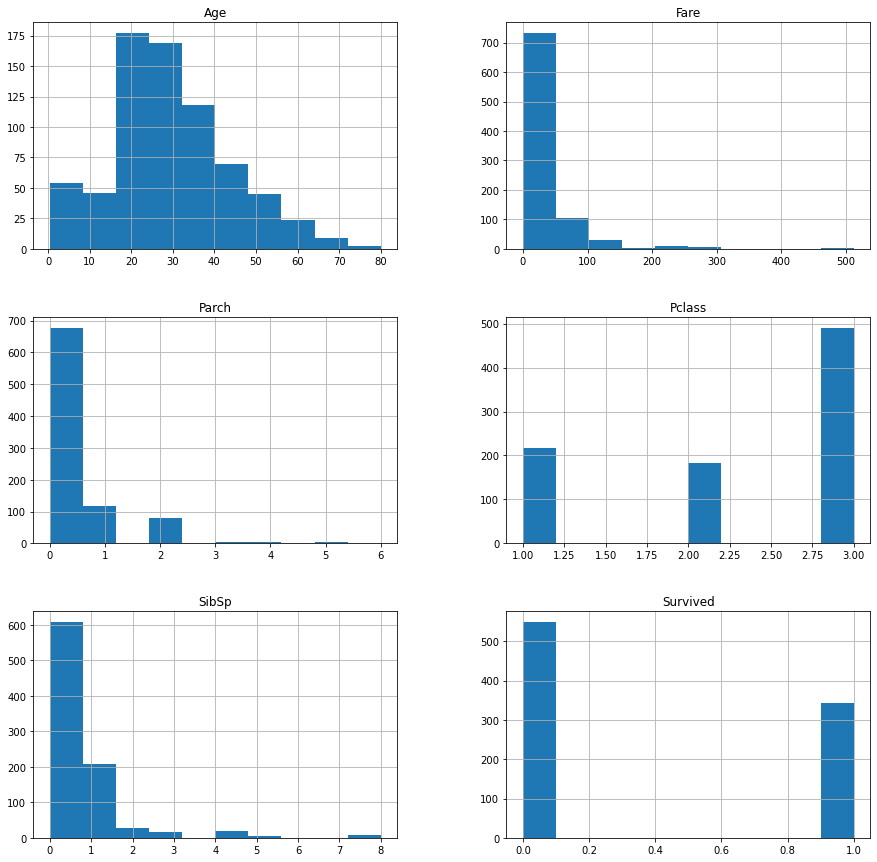

In [688]:
train_df.hist(figsize=(15,15))
plt.show()

In [689]:
train_df['Family'] = train_df.Parch + train_df.SibSp
train_df.drop("SibSp",axis=1,inplace=True)
train_df.drop("Parch",axis=1,inplace=True)


test_df['Family'] = test_df.Parch + test_df.SibSp
test_df.drop("SibSp",axis=1,inplace=True)
test_df.drop("Parch",axis=1,inplace=True)
# test_df['Family'] = train_df.Parch + train_df.SibSp
train_df['Is_Alone'] = train_df.Family == 0
test_df['Is_Alone'] = test_df.Family == 0

In [690]:
train_df["Embarked"].isna().sum()
train_df["Embarked"].dropna().mode()[0]


'S'

In [691]:
train_df["Embarked"].fillna("S",inplace=True)
train_df["Embarked"].isna().sum()

0

In [692]:
train_df=train_df.drop("Name",axis=1)
train_df


,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,1,False
2,1,1,female,38.0,71.2833,C,1,False
3,1,3,female,26.0,7.9250,S,0,True
4,1,1,female,35.0,53.1000,S,1,False
5,0,3,male,35.0,8.0500,S,0,True
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,13.0000,S,0,True
888,1,1,female,19.0,30.0000,S,0,True
889,0,3,female,NaN,23.4500,S,3,False


In [693]:
test_df.drop("Name",axis=1,inplace=True)
test_df


,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
PassengerId,,,,,,,
892,3,male,34.5,7.8292,Q,0,True
893,3,female,47.0,7.0000,S,1,False
894,2,male,62.0,9.6875,Q,0,True
895,3,male,27.0,8.6625,S,0,True
896,3,female,22.0,12.2875,S,2,False
...,...,...,...,...,...,...,...
1305,3,male,NaN,8.0500,S,0,True
1306,1,female,39.0,108.9000,C,0,True
1307,3,male,38.5,7.2500,S,0,True


In [694]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
std=le.fit_transform(train_df["Embarked"])
train_df["Embarked"]=std
# li=[]
# for i in range(train_df.shape[0]):
#     if train_df["Embarked"][i] ==0:
#         li.append([0,0,1])
#     elif i ==1:
#         li.append([0,1,0])
#     elif i==2:
#         li.append([1,0,0])
# df_li=pd.DataFrame(data=li,columns=["Embarked1","Embarked2","Embarked3"])
# train_df=pd.concat([train_df,df_li],axis=1)
# train_df
std=le.fit_transform(test_df["Embarked"])
test_df["Embarked"]=std


In [695]:
std=le.fit_transform(train_df["Sex"])
train_df["Sex"]=std
train_df["Sex"]
std=le.fit_transform(test_df["Sex"])
test_df["Sex"]=std
test_df["Sex"]

std=le.fit_transform(train_df["Is_Alone"])
train_df["Is_Alone"]=std
train_df["Is_Alone"]
std=le.fit_transform(test_df["Is_Alone"])
test_df["Is_Alone"]=std
test_df["Is_Alone"]




PassengerId
892     1
893     0
894     1
895     1
896     0
       ..
1305    1
1306    1
1307    1
1308    1
1309    0
Name: Is_Alone, Length: 418, dtype: int64

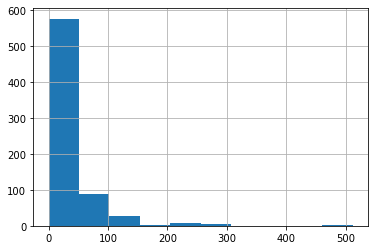

In [696]:
train_df=train_df.dropna()

# x=train_df.drop("Survived",axis=1)
# y=train_df["Survived"]
x_train=x
train_df["Fare"].hist()
for i in train_df.index:
    if (train_df["Fare"][i]<100 and train_df["Fare"][i]>0):
        train_df["Fare"][i]=1
    elif (train_df["Fare"][i]<350 and train_df["Fare"][i]>=100):
        train_df["Fare"][i]=2
    elif (train_df["Fare"][i]<600 and train_df["Fare"][i]>=350):
        train_df["Fare"][i]=3


In [697]:
nullval=test_df[test_df["Fare"].isna()]
nullval

,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
PassengerId,,,,,,,
1044,3,1,60.5,NaN,2,0,1


In [699]:
avgfare=test_df[test_df["Pclass"]==3]
avgfare= test_df.loc[1044]["Fare"]=avgfare["Fare"].mean()
test_df['Fare'].fillna(avgfare, inplace=True)

In [700]:
test_df

,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
PassengerId,,,,,,,
892,3,1,34.5,7.8292,1,0,1
893,3,0,47.0,7.0000,2,1,0
894,2,1,62.0,9.6875,1,0,1
895,3,1,27.0,8.6625,2,0,1
896,3,0,22.0,12.2875,2,2,0
...,...,...,...,...,...,...,...
1305,3,1,NaN,8.0500,2,0,1
1306,1,0,39.0,108.9000,0,0,1
1307,3,1,38.5,7.2500,2,0,1


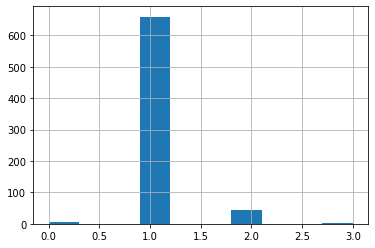

In [701]:
train_df["Fare"].hist()

In [702]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
PassengerId,,,,,,,,
1,0,3,1,22.0,1.0,2,1,0
2,1,1,0,38.0,1.0,0,1,0
3,1,3,0,26.0,1.0,2,0,1
4,1,1,0,35.0,1.0,2,1,0
5,0,3,1,35.0,1.0,2,0,1
...,...,...,...,...,...,...,...,...
886,0,3,0,39.0,1.0,1,5,0
887,0,2,1,27.0,1.0,2,0,1
888,1,1,0,19.0,1.0,2,0,1


In [704]:

test_df

,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
PassengerId,,,,,,,
892,3,1,34.5,7.8292,1,0,1
893,3,0,47.0,7.0000,2,1,0
894,2,1,62.0,9.6875,1,0,1
895,3,1,27.0,8.6625,2,0,1
896,3,0,22.0,12.2875,2,2,0
...,...,...,...,...,...,...,...
1305,3,1,NaN,8.0500,2,0,1
1306,1,0,39.0,108.9000,0,0,1
1307,3,1,38.5,7.2500,2,0,1


# AGE

In [705]:
# create empty array  for later use

guess_ages = np.zeros((2,3),dtype=int) 
guess_ages

array([[0, 0, 0],
       [0, 0, 0]])

In [706]:
# Fill the NA's for the Age columns
# with "qualified guesses"


print('Guess values of age based on sex and pclass of the passenger...')
for i in range(0, 2):
    for j in range(0,3):
        guess_df = test_df[(test_df['Sex'] == i) \
                    &(test_df['Pclass'] == j+1)]['Age'].dropna()

        # Extract the median age for this group
        # (less sensitive) to outliers
        age_guess = guess_df.median()

        # Convert random age float to int
        guess_ages[i,j] = int(age_guess)


print('Guess_Age table:\n',guess_ages)
print ('\nAssigning age values to NAN age values in the test_df...')

for i in range(0, 2):
    for j in range(0, 3):
        test_df.loc[ (test_df.Age.isnull()) & (test_df.Sex == i) \
                & (test_df.Pclass == j+1),'Age'] = guess_ages[i,j]


test_df['Age'] = test_df['Age'].astype(int)
print()
print('Done! \n\n\n')
test_df.isna().sum()

Guess values of age based on sex and pclass of the passenger...
Guess_Age table:
 [[41 24 22]
 [42 28 24]]

Assigning age values to NAN age values in the test_df...

Done! 





Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
Is_Alone    0
dtype: int64

In [707]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [708]:
x_train=train_df.drop("Survived",axis=1)
y_train=train_df["Survived"]
x_test=test_df


import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameter= {"n_estimators":[200,400,800,1000,1300,1600,2000,2500,3000,3500],"criterion":["entropy"],"max_depth":[10,20,50,100,200,1000,1600,2000,3000,3500]}
# parameter= {"n_estimators":[200,400,800,1000,1300,1600,2000,2500,3000,3500],"criterion":["entropy"],"max_depth":[20,25],"max_features":[25,28,30]}


model = RandomForestClassifier()
clf=GridSearchCV(model,parameter,cv=3,return_train_score=True,n_jobs=-1,verbose=100)
clf.fit(x_train,y_train)


In [709]:
clf.best_params_

AttributeError: 'NuSVC' object has no attribute 'best_params_'

In [716]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_jobs=-1,n_estimators=200,max_features= 7,max_depth= 10,criterion= 'entropy')
clf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=7,
                       n_estimators=200, n_jobs=-1)

In [656]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)


GradientBoostingClassifier()

In [657]:


from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
#     KNeighborsClassifier(3,n_jobs=-1),
#     SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(n_jobs=-1),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis()
]

# Logging for Visual Comparison
# log_cols=["Classifier", "Accuracy", "Log Loss"]
# log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
#     name = clf.__class__.__name__
    
#     print("="*30)
#     print(name)
    
#     print('****Results****')
#     train_predictions = clf.predict(x_test)
#     acc = accuracy_score(y_test, train_predictions)
#     print("Accuracy: {:.4%}".format(acc))
    
#     train_predictions = clf.predict_proba(x_test)
#     ll = log_loss(y_test, train_predictions)
#     print("Log Loss: {}".format(ll))
    
#     log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
#     log = log.append(log_entry)
    
# print("="*30)

In [717]:
# clf.score(x_test,y_test)
y_predicted=clf.predict(x_test)
y_predicted.shape

(418,)

In [719]:
test_df

,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
PassengerId,,,,,,,
892,3,1,34,7.8292,1,0,1
893,3,0,47,7.0000,2,1,0
894,2,1,62,9.6875,1,0,1
895,3,1,27,8.6625,2,0,1
896,3,0,22,12.2875,2,2,0
...,...,...,...,...,...,...,...
1305,3,1,24,8.0500,2,0,1
1306,1,0,39,108.9000,0,0,1
1307,3,1,38,7.2500,2,0,1


In [721]:
submission = pd.DataFrame({
        "PassengerId": test_df.index,
        "Survived": y_predicted
    })
submission.to_csv('titanic8.csv', index=False)